<a href="https://colab.research.google.com/github/fernandodeeke/can2025/blob/main/edo_taylor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1></h1></center>
<center><h1>Análise Numérica</h1></center>
<center><h2>2025/1</h2></center>
<center><h3>Método da Série de Taylor</h3></center>
<center><h4>Prof. Fernando Deeke Sasse - CCT, UDESC</h4></center>

### 1. Introdução

O método da série de Taylor é uma generalização imediata do método de Euler simples para ordens superiores. Dado um PVI do tipo

$$
y'= f(t,y(t))\,\qquad y(t_0)=y_0\,,
$$

buscamos uma aproximação do tipo:


$$
y(t+h)\approx y(t)+h \frac{dy(t)}{dt}+\frac{h^2}{2}\frac{d^2y(t)}{dt^2}+ \cdots +\frac{h^k}{k!} \frac{d^ky(t)}{dt^k}\,.
$$

### 2. Método de segunda ordem

O método da série de Taylor de segunda ordem consiste em manter os termos até a segunda derivada de $y(t)$. O erro local será de ordem $O(h^3)$ e o global $O(h^2)$. Portanto, definimos o processo iterativo:

\begin{align}
y(t+h):= &\,u(t)+hf(t,y(t))+\frac{h^2}{2}\frac{df(t,y(t))}{dt}\\
 :=&\,u(t)+hf(t,y(t))+\frac{h^2}{2}\left[\frac{\partial f(t,y(t))}{\partial t}+\frac{\partial f(t,y(t))}{\partial y}f(t,y(t))\right]
\end{align}


### Exemplo 2.1
Verifiquemos o desempenho do método da série de Taylor resolvendo um caso para o qual conhecemos a solução exata. Consideremos o problema de valor inicial

$$
y' +y-ty^3=0\,,\qquad y(0)=1\,
$$

e determinemos a solução no intervalo $[0.2]$ com subintervalos $h=0.005$.
Esta é uma equação de Bernoulli, e a solução para o PVI é dada por

$$
y = \frac{2}{\sqrt{2+4t+2 \mbox{e}^{2t}}}
$$

Aqui

$$
y' = f(t,y(t)) = -y+ty^3,
$$

e

\begin{align}
\frac{df}{dt} &= -\frac{dy}{dt}+y^3+t3y^2\frac{dy}{dt}\\
&= y-4ty^3+y^3+3t^2y^5\,.
\end{align}

O processo iterativo é então dado por

$$
y(t+h) = y(t) + h\left[-y(t)+ty(t)^3\right]+\frac{h^2}{2}\left[y(t)-4ty(t)^3+y(t)^3+3t^2y(t)^5\right]\,.
$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Definimos $f(t,y(t)$ e sua derivada total $df/dt$:

In [ ]:
f = lambda x,y: -y+x*y**3

In [ ]:
df = lambda x,y: y+y**3-4*x*y**3+3*x**2*y**5

A função que realiza o processo iterativo é uma simples generalização da função já construída para o método de Euler simples:

In [ ]:
def odeTaylor2(f,df,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    h = t[1] - t[0]
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + h*f(t[n],y[n])+h**2/2*df(t[n],y[n])
    return y

Definimos o valor inicial e a malha:

In [ ]:
y0 = 1

In [ ]:
t = np.linspace(0,2,41)

Notemos que $h=0.05$:

In [ ]:
t[1]-t[0]

0.05

Podemos agora calcular os valores de $y(t)$ nesta malha:

In [ ]:
Y = odeTaylor2(f,df,t,y0)

Façamos um gráfico do resultado:

Text(0, 0.5, 'y')

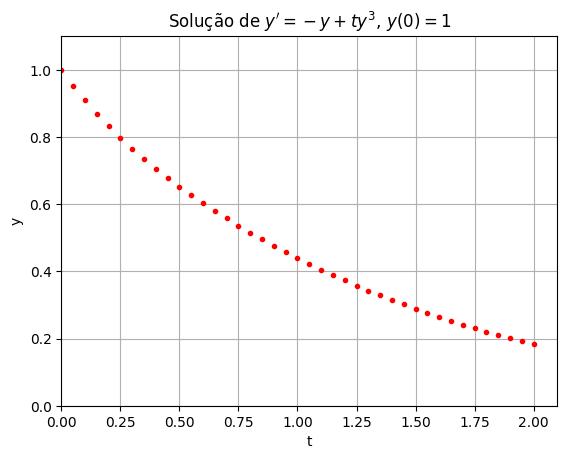

In [ ]:
plt.plot(t,Y,'r.')
plt.axis([0,2.1,0.,1.1])
plt.grid(True)
plt.title(r"Solução de $y'=-y+ty^3,\, y(0)=1$");
plt.xlabel('t')
plt.ylabel('y')

Para avaliar a acurácia do método podemos comparar o resultado numérico com o analítico:

In [ ]:
yexata = lambda t: 2/(2+4*t+2*np.exp(2*t))**(1/2)

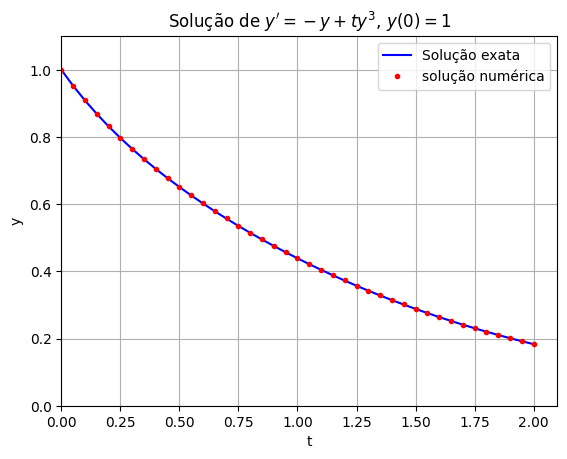

In [ ]:
plt.plot(t,yexata(t),'b-')
plt.plot(t,Y,'r.')
plt.axis([0,2.1,0.,1.1])
plt.grid(True)
plt.title(r"Solução de $y'=-y+ty^3,\, y(0)=1$");
plt.xlabel('t')
plt.ylabel('y')
plt.legend(["Solução exata", "solução numérica"])

Visualmente não há diferença. Para quantificar o erro na aproximação numérica podemos fazer um gráfico do erro em cada ponto:

Text(0, 0.5, 'erro')

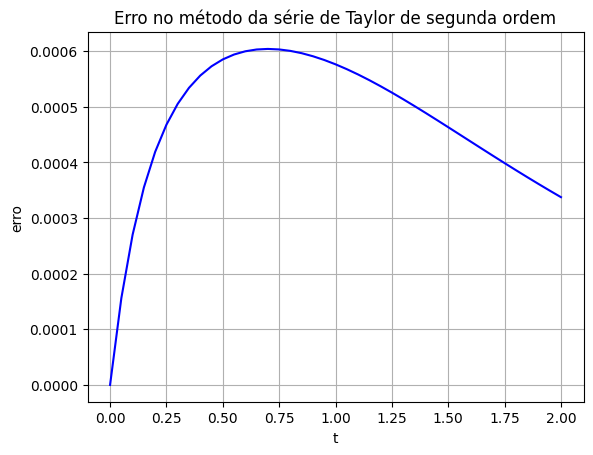

In [ ]:
plt.plot(t,abs(yexata(t)-Y),'b-')
plt.grid(True)
plt.title("Erro no método da série de Taylor de segunda ordem");
plt.xlabel('t')
plt.ylabel('erro')

Temos um erro da ordem de $5 \times 10^{-6}$.

### 3. Método de terceira ordem

O procedimento anterior pode ser facilmente generalizado para terceira ordem.

### Exemplo 3.1
Consideremos novamente o PVI do Exemplo 2.1. A segunda derivada de $f(t,y(t))$ foi calculada com Maple.

In [ ]:
f = lambda x,y: -y+x*y**3

In [ ]:
df1 = lambda x,y: y+y**3-4*x*y**3+3*x**2*y**5

In [ ]:
df2 = lambda t,Y: -Y+t*Y**3-Y**3-3*t*Y**2*(t*Y**3-Y)+6*Y**2*(t*Y**3-Y)+6*t*Y*(t*Y**3-Y)**2+3*t*Y**2*(Y-t*Y**3+Y**3+3*t*Y**2*(t*Y**3-Y))

A única modificação na função definida anteriormente é a adição do termo de segunda ordem:

In [ ]:
def odeTaylor3(f,df,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        y[n+1] = y[n] + h*f(t[n],y[n])+h**2/2*df1(t[n],y[n])+(h**3/6)*df2(t[n],y[n])
    return y

In [ ]:
Y3 = odeTaylor3(f,df,t,y0)

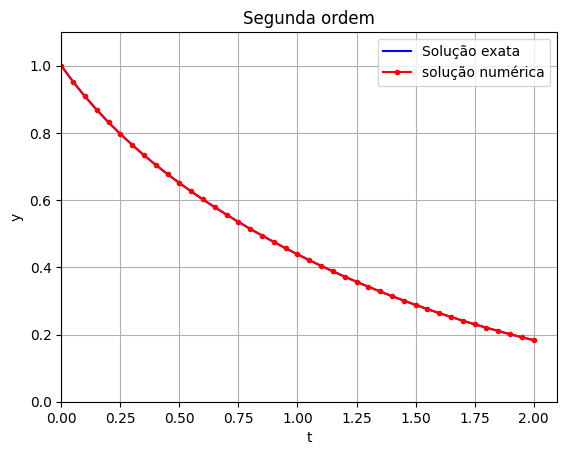

In [ ]:
plt.plot(t,yexata(t),'b-')
plt.plot(t,Y3,'r.-')
plt.axis([0,2.1,0.,1.1])
plt.grid(True)
plt.title("Segunda ordem");
plt.xlabel('t')
plt.ylabel('y')
plt.legend(["Solução exata", "solução numérica"])

Façamos o gráfico do erro:

Text(0, 0.5, 'erro')

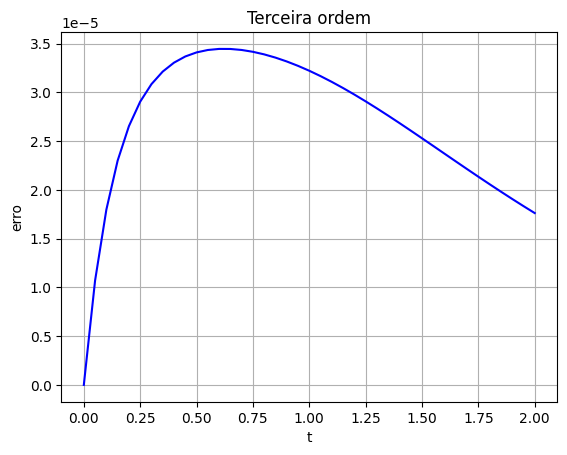

In [ ]:
plt.plot(t,abs(yexata(t)-Y3),'b-')
plt.grid(True)
plt.title("Terceira ordem");
plt.xlabel('t')
plt.ylabel('erro')

Temos agora um erro da ordem de $3\times 10^{-8}$.

### Código em Maple para o cálculo de derivadas

Estes são os comandos para gerar derivadas de ordens superiores de $f(t,y(t))$:

<code>
f:=-y(t)+t*y(t)^3;
F:=subs(y(t)=Y,f);
Calculemos  a primeira derivada
dy2:=diff(f,t);
dy2:=subs(diff(y(t),t)=f,dy2);
Dy2:=subs(y(t)=Y,dy2);
DY2:=unapply(Dy2,t,Y);
Para o cálculo da terceira derivada o processo é repetido:
dy3:=diff(dy2,t);
dy3:=subs(diff(y(t),t)=f,dy3);
Dy3:=subs(y(t)=Y,dy3);
DY3:=unapply(Dy3,t,Y);
</code>

## 4. Exercícios

1. Resolva os problemas de valor inicial abaixo usando o método da série de Taylor de segunda ordem, no intervalo indicado. Apresente cada solução graficamente.

\begin{align}
(i) & \qquad y'+ y \sin y -ty=3\,,\qquad y(0)=1,\,\,t\in [0,2].\\
(ii) & \qquad y''+t y'+4y = \sin(4t),\qquad y(0)=1\,, y'(0) = -1,\,t\in [0,4].\\
\end{align}

2. Resolva o problema 1 usando o método da série de Taylor de terceira ordem.